<a href="https://colab.research.google.com/github/NaveenShetter1/Machine-Leaning-Notebooks/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [239]:
# Lasso and Ridge are feature selection techniques

In [240]:
# Lasso is called L1 and Ridge is L2

In [241]:
# if we are failing due to overfitting we will got Lasso or Ridge method

In [242]:
# feature selection is taking input independent or features which are highly related to each other

In [243]:
# cost_function=sum(|y-yp|)power2 for normal linear reg problem

In [244]:
# cost_function=min(sum(|y-yp|)power2)+lambda*sum(m)power2 for normal ridge reg problem, if we have less data we go by ridge method

In [245]:
# Logistic regression method is the method the underlieng concept is reg but result in classification

In [246]:
# decision boundary 0.5 if binary 0 or 1

In [247]:
# sigmoid  converts value to b/e 0 to 1

In [248]:
# if value=25 --sigmoind-->0.6 -- decision bounday(0.5)or threshold--->if >05(yes(1)) else (no(0))

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [251]:
df=pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

In [252]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [254]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [255]:
# so no null values

In [256]:
# conevrt object or categorical data to numerical data

In [257]:
from sklearn.preprocessing import LabelEncoder

In [258]:
le=LabelEncoder()

df['Gender1']=le.fit_transform(df['Gender'])
df['Gender2']=le.inverse_transform(df['Gender1'])

le.inverse_transform([0])


array(['Female'], dtype=object)

In [259]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender1,Gender2
0,15624510,Male,19.0,19000.0,0,1,Male
1,15810944,Male,35.0,20000.0,0,1,Male
2,15668575,Female,26.0,43000.0,0,0,Female
3,15603246,Female,27.0,57000.0,0,0,Female
4,15804002,Male,19.0,76000.0,0,1,Male


In [260]:
df.shape

(400, 7)

In [261]:
new_df=df[['Age','EstimatedSalary','Gender1','Purchased']]

In [262]:
x=df[['Age','EstimatedSalary','Gender1']]

In [263]:
y=df[['Purchased']]

In [264]:
x.shape

(400, 3)

In [265]:
y.shape

(400, 1)

In [266]:
new_df.corr()

,Age,EstimatedSalary,Gender1,Purchased
Age,1.000000,0.155238,-0.073741,0.622454
EstimatedSalary,0.155238,1.000000,-0.060435,0.362083
Gender1,-0.073741,-0.060435,1.000000,-0.042469
Purchased,0.622454,0.362083,-0.042469,1.000000


In [267]:
from scipy.stats import zscore

In [268]:
for i in new_df.columns:
  print(i)

Age
EstimatedSalary
Gender1
Purchased


In [269]:
for i in new_df.columns:
  new_df[f'{i}_zscore']=zscore(new_df[i])

<ipython-input-269-3a7056050a1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[f'{i}_zscore']=zscore(new_df[i])
<ipython-input-269-3a7056050a1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[f'{i}_zscore']=zscore(new_df[i])


In [270]:
new_df

,Age,EstimatedSalary,Gender1,Purchased,Age_zscore,EstimatedSalary_zscore,Gender1_zscore,Purchased_zscore
0,19.0,19000.0,1,0,-1.781797,-1.490046,1.020204,-0.745936
1,35.0,20000.0,1,0,-0.253587,-1.460681,1.020204,-0.745936
2,26.0,43000.0,0,0,-1.113206,-0.785290,-0.980196,-0.745936
3,27.0,57000.0,0,0,-1.017692,-0.374182,-0.980196,-0.745936
4,19.0,76000.0,1,0,-1.781797,0.183751,1.020204,-0.745936
...,...,...,...,...,...,...,...,...
395,46.0,41000.0,0,1,0.797057,-0.844019,-0.980196,1.340598
396,51.0,23000.0,1,1,1.274623,-1.372587,1.020204,1.340598
397,50.0,20000.0,0,1,1.179110,-1.460681,-0.980196,1.340598
398,36.0,33000.0,1,0,-0.158074,-1.078938,1.020204,-0.745936


In [271]:
for i in new_df.columns:
  if 'zscore' in i:
    # print(i)
    if (new_df[f'{i}'].abs().gt(3).any()):  # Check if any value > 3 or < -3
        print(f"Outliers detected in column {i}:")
        print(new_df.loc[new_df[f'{i}'].abs() > 3, [i, f'{i}']])

In [272]:
# so no outliers here

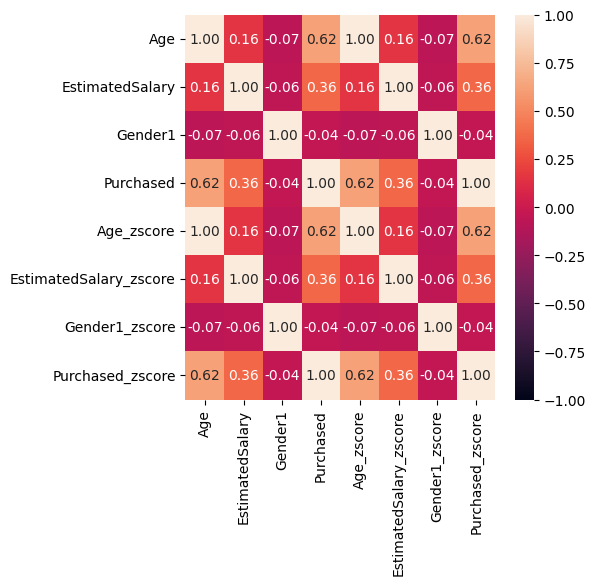

In [273]:
plt.figure(figsize=(5,5))

sns.heatmap(new_df.corr(),fmt='0.2f',linecolor='black',annot=True,vmin=-1,vmax=+1)

plt.show()

In [274]:
# here above it shows age and purchase has good relation means linear relation

In [275]:
x.columns

Index(['Age', 'EstimatedSalary', 'Gender1'], dtype='object')

In [276]:
vdata=pd.DataFrame()

In [277]:
vdata['features']=x.columns

In [278]:
vdata.head()

,features
0,Age
1,EstimatedSalary
2,Gender1


In [279]:
# to check multicolliniarity we use vif

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [280]:
vdata['VIF']=[vif(x.values,i) for i in range(len(x.columns))]

In [281]:
vdata.head()

,features,VIF
0,Age,5.122407
1,EstimatedSalary,4.601775
2,Gender1,1.783132


In [282]:
# here age is having higher co relation with estimated salary and gender so it is better to remove or transform age using PCA

In [283]:
x.head()

,Age,EstimatedSalary,Gender1
0,19.0,19000.0,1
1,35.0,20000.0,1
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,1


In [284]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [285]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [286]:
x_train.shape


(320, 3)

In [287]:
x_test.shape

(80, 3)

In [288]:
y_train.shape

(320, 1)

In [289]:
y_test.shape

(80, 1)

In [290]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [291]:
y_pred_test=lr.predict(x_test)

In [292]:
from sklearn.metrics import accuracy_score,r2_score, confusion_matrix, classification_report

In [293]:
print("accurcy score: ", accuracy_score(y_test,y_pred_test))

accurcy score:  0.8875


In [294]:
# accuracy_score we need to use for classifiction problem so our model is predicting better

In [295]:
print("r2 score: ", r2_score(y_test,y_pred_test))

r2 score:  0.5054945054945056


In [296]:
# r2_score we should not use here as output is classification

In [297]:
y_pred_train=lr.predict(x_train)

In [298]:
print("accurcy score: ", accuracy_score(y_train,y_pred_train))

accurcy score:  0.834375


In [299]:
# here our model is predicting correctly both in test and train so no underfit and overfit issue


In [300]:
print("confusion_matrix : ", confusion_matrix(y_test,y_pred_test))

confusion_matrix :  [[50  2]
 [ 7 21]]


In [301]:
print("classification report : ", classification_report(y_test,y_pred_test))

classification report :                precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [302]:
x_test.head()

,Age,EstimatedSalary,Gender1
209,46.0,22000.0,0
280,59.0,88000.0,0
33,28.0,44000.0,0
210,48.0,96000.0,0
93,29.0,28000.0,0


In [303]:
y_pr=lr.predict([[40,10000,1]])
print(y_pr[0])

if y_pr[0]==0:
  print('won\'t purchase ')

else:
  print('yes purchases')

0
won't purchase 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [304]:
y_pr=lr.predict([[40,100000,1]])
print(y_pr[0])

if y_pr[0]==0:
  print('won\'t purchase ')

else:
  print('yes purchases')

1
yes purchases


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [305]:
print(le.inverse_transform([0]))


['Female']


In [306]:
df['Gender'].unique()[0]

'Male'

In [307]:
from sklearn.metrics import ConfusionMatrixDisplay

In [308]:
di=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))

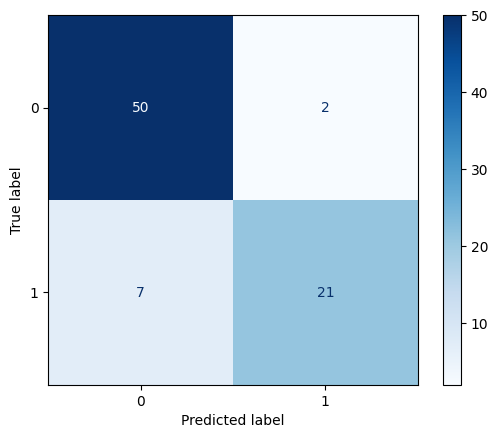

In [309]:
di.plot(cmap='Blues')

In [310]:
from sklearn.metrics import precision_score, recall_score,roc_auc_score, roc_curve

In [311]:
precision_score(y_test,y_pred_test)

0.9130434782608695

In [312]:
recall_score(y_test,y_pred_test)

0.75

In [313]:
roc_auc=roc_auc_score(y_test,y_pred_test)

In [314]:
roc_auc

0.8557692307692307

In [315]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_test)

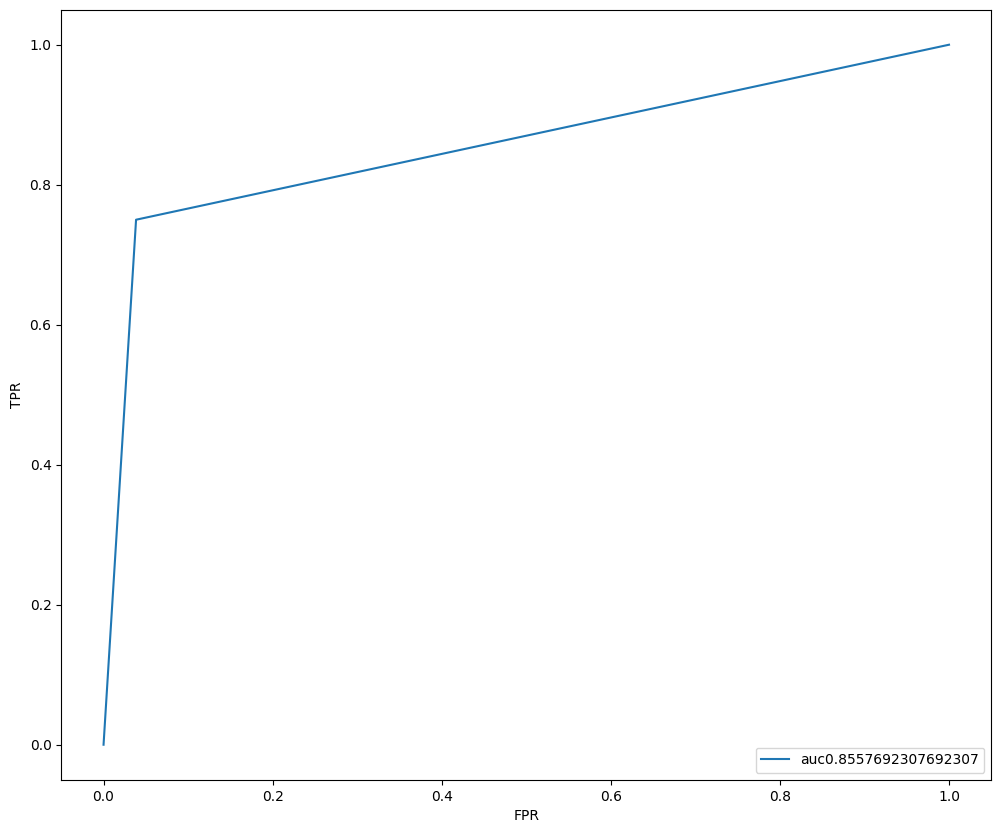

In [316]:
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label='auc'+str(roc_auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()